<a href="https://colab.research.google.com/github/tmtakashi/machine_learning_notebooks/blob/master/essence_of_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習アルゴリズムまとめ

##線形回帰モデル
$y = w_0 + w_1x_1 + w_2x_2 + \cdots + w_dx_d $ \
ベクトル$\textbf{x} = (x_1, x_2, \ldots, x_d)$に対して要素1を付加した \
ベクトル$\tilde{\textbf x} = (1, x_1, x_2, \ldots, x_d)$を考え、
$\textbf w = (w_0, w_1, \ldots, w_d)$を定義すると \

$$
y = \textbf{w}^T \tilde{\textbf{x}}
$$

データセットに当てはめると
$$\hat{\textbf{y}}(\textbf{w}) = \tilde{\textbf{X}}\textbf{w}$$

誤差関数は
$$
\begin{eqnarray}
E(w) &=& ||\textbf{y} - \tilde{\textbf{X}}\textbf{w}||^2\\
&=& (\textbf{y} - \tilde{\textbf{X}}\textbf{w})^T(\textbf{y} - \tilde{\textbf{X}}\textbf{w})\\
&=& \textbf{y}^T\textbf{y} - \textbf{w}^T\tilde{\textbf{X}}^T\textbf{y} - \textbf{y}^T\tilde{\textbf{X}}\textbf{w} + \textbf{w}^T\tilde{\textbf{X}}^T\tilde{\textbf{X}}\textbf{w}
\end{eqnarray}
$$

誤差関数の勾配を求めると
$$
\nabla E(\textbf{w}) = -2\tilde{\textbf{X}}\textbf{y} + 2\tilde{\textbf{X}}^T\tilde{\textbf{X}}\textbf{w}
$$ 
これを0とおくと誤差関数を最小化する$\textbf{w}$は
$$
\begin{eqnarray}
\tilde{\textbf{X}}^T\tilde{\textbf{X}}\textbf{w} &=& \tilde{\textbf{X}}\textbf{y}\\
\textbf{w} &=& (\tilde{\textbf{X}}^T\tilde{\textbf{X}})^{-1}\tilde{\textbf{X}}^T\textbf{y}
\end{eqnarray}
$$






### 実装

In [0]:
import numpy as np
from scipy import linalg

class LinearRegression:
  def __init__(self):
    self.w_ = None
  
  def fit(self, X, t):
    Xtil = np.c_[np.ones(X.shape[0]), X]
    A = np.dot(Xtil.T, Xtil)
    B = np.dot(Xtil.T, y)
    self.w_ = linalg.solve(A, B)
    
  def predict(self, X):
    if X.ndim == 1:
      X = X.reshape(1, -1)
    Xtil = np.c_[np.ones(X.shape[0]), X]
    return np.dot(Xtil, self.w_)

### 人口データを用いた実験

係数:  [1.11450326 1.95737004 3.00295751]
(1, 1)に対する予測値： [6.07483081]


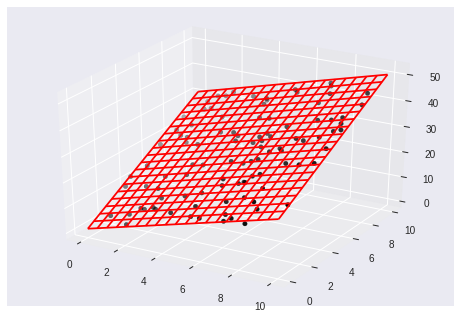

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3

y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = LinearRegression()
model.fit(X, y)
print("係数: ", model.w_)
print("(1, 1)に対する予測値：", model.predict(np.array([1, 1])))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                          np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + 
         model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')
plt.show()

### 実データを用いた実験

In [0]:
rerer